<a href="https://colab.research.google.com/github/elmilanos/ProbabilityStatistics/blob/main/Pr%C3%A1ctica_11_Regresi%C3%B3n_Lineal_y_An%C3%A1lisis_de_Correlaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Cargar archivo Excel
excel_path = "/Practica_Regresion_Correlacion.xlsx"
excel_file = pd.ExcelFile(excel_path)

# Ver las hojas disponibles
excel_file.sheet_names

['Estudio_Calificación', 'Temp_VentasHelado']

# Calculo de datos Hoja 1  **(Calificacion x Estudio)**

In [3]:
# Cargar los datos de la primera hoja
df_estudio = excel_file.parse('Estudio_Calificación')
df_estudio.head()


,Horas de Estudio,Calificación
0,1,50
1,2,52
2,3,55
3,4,57
4,5,60


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X = df_estudio['Horas de Estudio'].values
Y = df_estudio['Calificación'].values

# Medias
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Cálculo de coeficientes de regresión
beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
beta_0 = Y_mean - beta_1 * X_mean

# Ecuación de regresión
def predict(x): return beta_0 + beta_1 * x
y_pred = predict(6)  # Predicción para 6 horas

# Coeficiente de correlación de Pearson
numerador = np.sum((X - X_mean) * (Y - Y_mean))
denominador = np.sqrt(np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2))
r = numerador / denominador

print(f'Ecuacion de Regresion: Y = {beta_0:.2f} + {beta_1:.2f}X')
print(f"Coeficiente de correlación de Pearson (r): {r:.3f}")
print(f'Prediccion para 6 horas: {y_pred:.2f} pt')

Ecuacion de Regresion: Y = 47.58 + 2.50X
Coeficiente de correlación de Pearson (r): 0.999
Prediccion para 6 horas: 62.59 pt


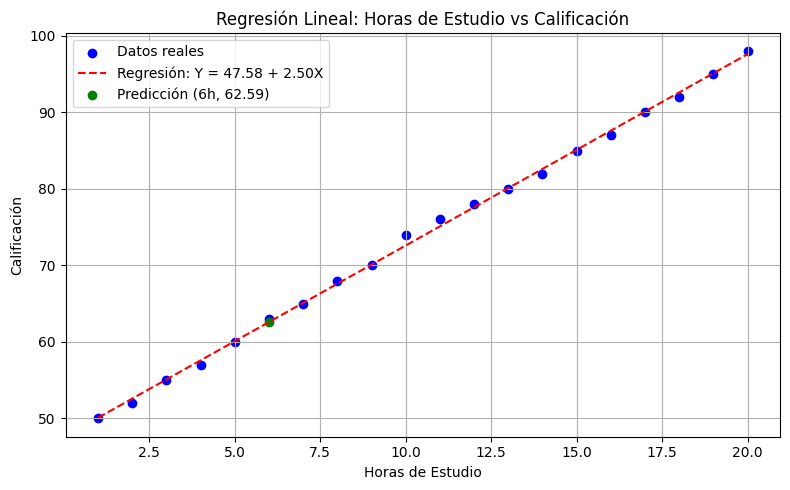

In [7]:
# Gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, predict(X), color='red', linestyle='--', label=f'Regresión: Y = {beta_0:.2f} + {beta_1:.2f}X')
plt.scatter(6, y_pred, color='green', label=f'Predicción (6h, {y_pred:.2f})')

plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.title('Regresión Lineal: Horas de Estudio vs Calificación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Gráfica: muestra una relación lineal muy fuerte entre las horas de estudio y la calificación. La línea de regresión ajusta casi perfectamente los datos, y se destaca la predicción para 6 horas de estudio.

## Conclusion
- **Horas de Estudio vs. Calificación:**
>- Correlación casi perfecta (r ≈ 0.999).
> - A más horas de estudio, mayor calificación.

---

# Calculo de Datos de la Hoja 2 **(Temperatura x Ventas de Helado)**

In [9]:
# Cargar los datos de la hoja Temp_VentasHelado
df_helado = excel_file.parse('Temp_VentasHelado')
df_helado.head()

,Temperatura (°C),Ventas de Helado
0,10,20
1,12,25
2,15,30
3,18,38
4,20,45


*Los datos muestran cómo cambian las ventas de helado con la temperatura ambiente.*

In [10]:
# Extraer valores
X2 = df_helado['Temperatura (°C)'].values
Y2 = df_helado['Ventas de Helado'].values

# Medias
X2_mean = np.mean(X2)
Y2_mean = np.mean(Y2)

# Coeficientes de regresión
beta_1_2 = np.sum((X2 - X2_mean) * (Y2 - Y2_mean)) / np.sum((X2 - X2_mean)**2)
beta_0_2 = Y2_mean - beta_1_2 * X2_mean

# Ecuación de predicción
def predict2(x): return beta_0_2 + beta_1_2 * x
y_pred_25 = predict2(25)  # Predicción para 25°C

# Coeficiente de correlación
numerador_2 = np.sum((X2 - X2_mean) * (Y2 - Y2_mean))
denominador_2 = np.sqrt(np.sum((X2 - X2_mean)**2) * np.sum((Y2 - Y2_mean)**2))
r2 = numerador_2 / denominador_2

print(f'Ecuacion de Regresion: Y = {beta_0_2:.2f} + {beta_1_2:.2f}X')
print(f"Coeficiente de correlación de Pearson (r): {r2:.3f}")
print(f'Prediccion para 25°C: {y_pred_25:.2f} ventas')

Ecuacion de Regresion: Y = -25.62 + 3.61X
Coeficiente de correlación de Pearson (r): 0.991
Prediccion para 25°C: 64.64 ventas


### Grafica de Regresion y Prediccion

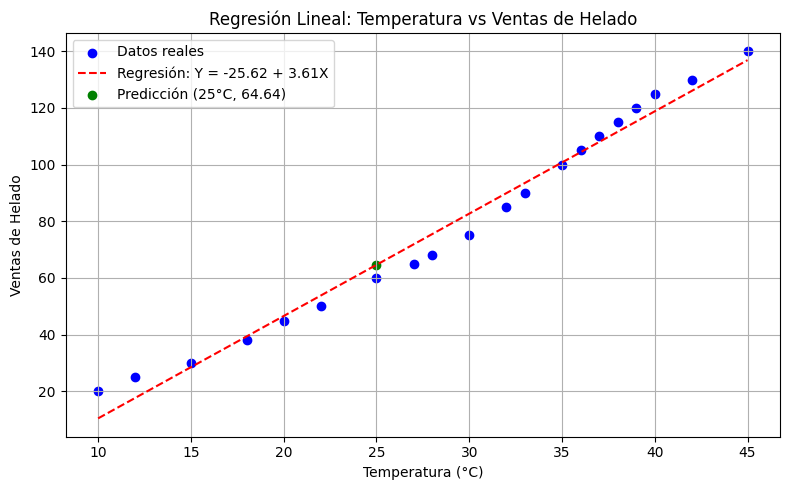

In [11]:
# Gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X2, Y2, color='blue', label='Datos reales')
plt.plot(X2, predict2(X2), color='red', linestyle='--', label=f'Regresión: Y = {beta_0_2:.2f} + {beta_1_2:.2f}X')
plt.scatter(25, y_pred_25, color='green', label=f'Predicción (25°C, {y_pred_25:.2f})')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Ventas de Helado')
plt.title('Regresión Lineal: Temperatura vs Ventas de Helado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Gráfica que muestra cómo aumentan las ventas de helado con la temperatura. La relación es claramente positiva y muy fuerte, lo cual es coherente con el valor alto del coeficiente de correlación (r ≈ 0.99).*

## Conclusion
- **Temperatura vs. Ventas de Helado:**
> - Correlación muy fuerte (r ≈ 0.991).
> - A mayor temperatura, más ventas de helado.